<a href="https://colab.research.google.com/github/Azrael-cmd/Simulacion/blob/main/Unidad3/Practica%206%20Distribucion%20Poisson%20y%20Exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación
## Unidad 3
### Practica 6: Simular las Llegadas de clientes y tiempos de servicio
Maestro: José Gabriel Rodríguez Rivas
Alumno: Jesús Sebastián Berumen

Llegadas simuladas por hora:
[13, 10, 5, 5, 13, 9, 11, 8, 9, 16, 13, 14, 8, 12, 10, 8, 5, 9, 7, 8, 11, 9, 10, 16, 10, 9, 8, 8, 7, 4, 12, 14, 12, 13, 14, 12, 9, 9, 7, 12, 7, 14, 5, 7, 13, 5, 9, 9, 8, 12, 7, 7, 7, 12, 9, 11, 10, 5, 10, 4, 15, 12, 10, 17, 9, 7, 7, 14, 8, 15, 6, 10, 9, 7, 10, 10, 9, 12, 12, 6, 15, 6, 7, 10, 12, 8, 5, 12, 5, 5, 8, 11, 12, 13, 11, 12, 5, 11, 7, 13, 17, 11, 14, 14, 10, 13, 9, 8, 7, 5, 10, 13, 15, 8, 10, 9, 9, 8, 14, 7, 15, 9, 11, 14, 12, 7, 8, 7, 4, 11, 16, 11, 6, 7, 6, 4, 11, 12, 9, 11, 7, 6, 14, 15, 17, 11, 7, 7, 11, 8, 9, 5, 14, 16, 10, 15, 4, 10, 8, 10, 7, 15, 11, 11, 3, 4, 2, 10, 13, 7, 5, 15, 8, 11, 7, 11, 4, 9, 13, 16, 7, 11, 12, 12, 12, 3, 10, 10, 6, 13, 12, 8, 14, 7, 11, 9, 11, 10, 10, 11, 6, 7, 14, 8, 8, 10, 9, 13, 8, 14, 8, 11, 14, 13, 16, 10, 10, 11, 11, 9, 9, 8, 11, 8, 9, 12, 9, 7, 8, 6, 7, 7, 14, 14, 7, 12, 10, 6, 9, 6, 13, 7, 10, 11, 5, 7, 9, 10, 7, 15, 11, 7, 10, 5, 18, 12, 10, 14, 11, 7, 14, 10, 16, 9, 8, 7, 11, 10, 14, 11, 8, 5, 7, 5, 7, 6, 

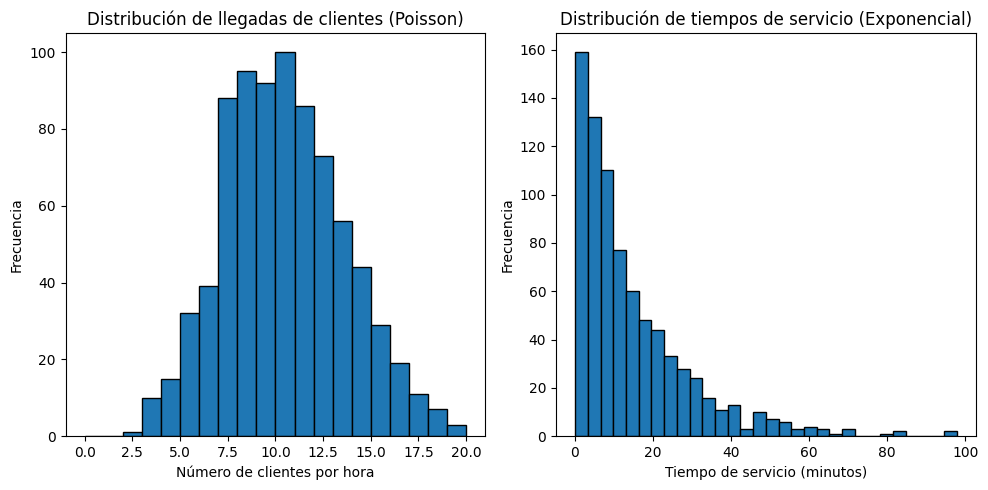

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
lambda_llegadas = 10
tiempo_servicio_promedio = 15
lambda_servicio = 1 / tiempo_servicio_promedio
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio
num_horas = 8
num_simulaciones = 100
llegadas_simuladas = []
servicios_simulados = []
for _ in range(num_horas):
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)
print("Llegadas simuladas por hora:")
print(llegadas_simuladas)
print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), edgecolor='black')
plt.title("Distribución de llegadas de clientes (Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.subplot(1, 2, 2)
plt.hist(servicios_simulados, bins=30, edgecolor='black')
plt.title("Distribución de tiempos de servicio (Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### Beneficio de uso de variables aleatorias
El uso de variables aleatorias en las distribuciones Poisson (para llegadas de clientes) y Exponencial (para tiempos de servicio) permite simular y analizar sistemas estocásticos como líneas de espera. La Poisson modela la cantidad de llegadas de clientes en un intervalo de tiempo, y la Exponencial simula el tiempo entre eventos, como el servicio a un cliente.

Estas simulaciones ayudan a mejorar la planificación de recursos y la eficiencia operativa en sistemas como centros de atención, tiendas o líneas de producción, optimizando la capacidad de atención y reduciendo tiempos de espera.